# data understanding of engineered features
This notebook takes care of the data understanding done on engineered features 

In [59]:
from os import path
import  pandas as pd
import seaborn 
import matplotlib.pyplot as plt
import numpy as np
ENGINEERED_RACES_PATH=path.join("..","dataset","engineered_races.csv")

The analysis is divided in three parts/comparisons:
- new vs old
- old vs old
- new vs new

first we extract the needed data.

In [ ]:
races_df=pd.read_csv(ENGINEERED_RACES_PATH)
races_df['date']=pd.to_datetime(races_df['date'])


oldf_df=races_df[[        
        'points', 
        'length', 
        'climb_total', 
        'profile', 
        'startlist_quality',
        'position', 
        'cyclist_age', 
        'is_tarmac',
        'delta'
        ]]

newf_df=races_df[[
        'climbing_efficiency', 
        'competitive_age',
        'difficulty', 
        'convenience_score',
        'difficulty_score', 
        'performance_index',
        'gain_ratio'
        ]]
old_corr_data=oldf_df.corr()
new_corr_data=newf_df.corr()

on_corr_data=races_df[[
        'climbing_efficiency', 
        'competitive_age',
        'difficulty', 
        'convenience_score',
        'difficulty_score', 
        'performance_index',
        'gain_ratio',
        'points', 
        'length', 
        'climb_total', 
        'profile', 
        'startlist_quality',
        'position', 
        'cyclist_age', 
        'is_tarmac',
        'delta'
]].corr()

on_corr_data=on_corr_data.drop(columns=oldf_df.columns,index=newf_df.columns)




## old vs old features

<Axes: >

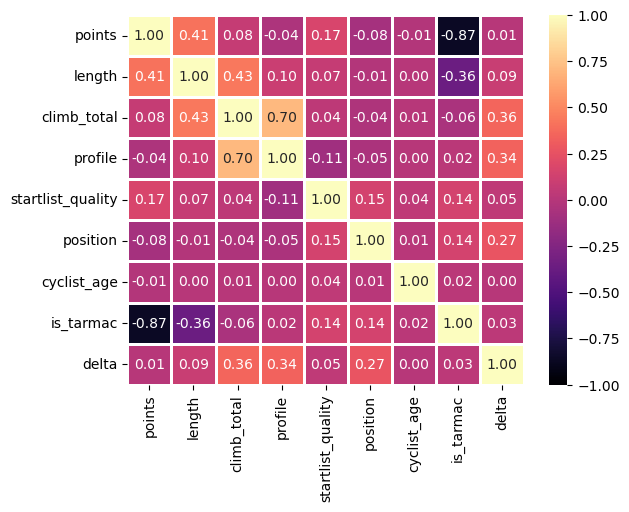

In [61]:
seaborn.heatmap(
    old_corr_data,
    annot=True, cmap='magma', vmin=-1, vmax=1, linewidths=1,fmt='.2f')

first length and delta are correlated which makes sense since longer tracks take more time to travel.

length and climb total are also highly related which makes snese given the fact that longer tracks require traveling thorugh longer steep parts .

profile and climb total is already explained.

is_tarmac has:
- a really negative coreraltion with points which is strange but could be explained with a very noise feature that so it's difficult to infer any acual relationship.
- a negative correltion with length which is difficult to explain but probvably also noise

delta has some interesting correlations:
- climb_total might make sense, since it might be explained by the fact that a high climb total might yield highh deltas, if we have a high climb total a racer will have to go through a lot of steep parts and keeping up with the pace of the race gets more difficult thus if the recer is left behind it is difficult recover w.r.t. to other types of tracks so it takes more time to reach the stage goal hence higher deltas.
- profile is strange, it might be coincidence given the encoding used for the profiles however if we stick to the logic behind the features engineering for terrain difficulty we observe taht profile encodings and the respective values maintain the same non de-crescent order meaning we get that higher profiles could be related to higher climb totals hence higher deltas. This also reinforces our theory on the mapping between profile encodings.


## new vs new features

<Axes: >

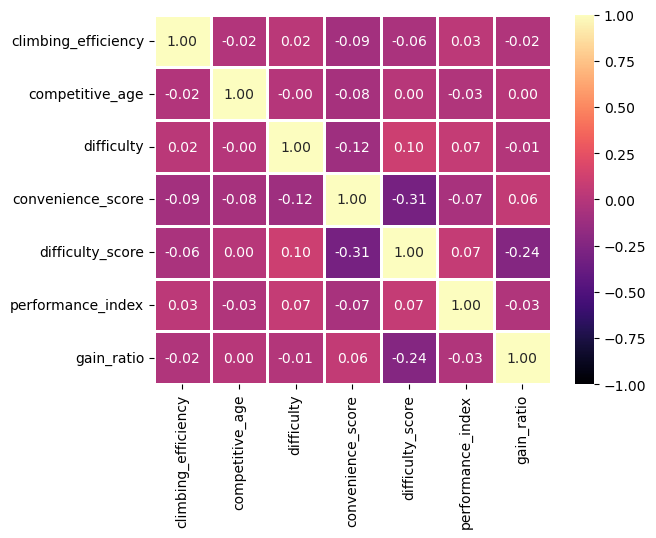

In [62]:
seaborn.heatmap(
    new_corr_data,
    annot=True, cmap='magma', vmin=-1, vmax=1, linewidths=1,fmt='.2f')

we can see no  real correlation aside from difficulty_score and convenience_score while we see the gain_ratio and difficulty_score also have negative correalation this makes sense sincea high_gain or convenience_score are related to a low difficulty.

## new vs old features

<Axes: >

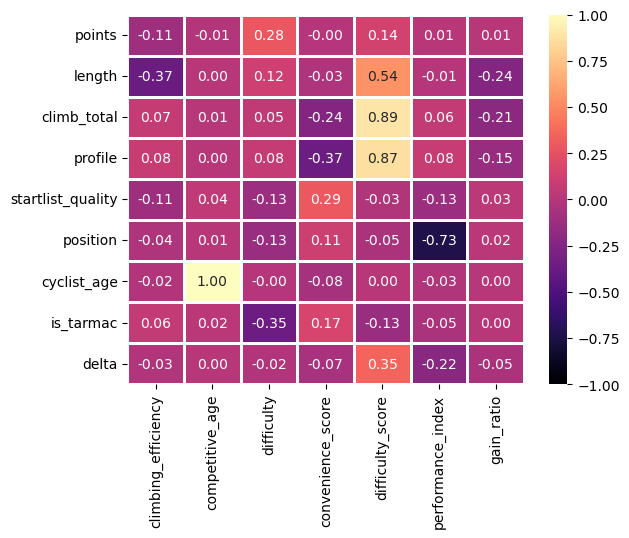

In [63]:
seaborn.heatmap(
    on_corr_data,
    annot=True, cmap='magma', vmin=-1, vmax=1, linewidths=1,fmt='.2f')

The difficulty score is of course  related to length, climb_total and profile since it is calculated using them however we see a correlation using delta which obvious given the correlation with how much time it takes to travel a difficult course whether it is due to steepness, high quotas or length.

Please note that the difficulty score is only related to races and not the single player capabilities, wee see a really low correlation with the difficulty which is also dependent on the single racer characteristics this fact suggests that difficulty is highly subjective to each player given its capabilities and physical attributes at the time the  race happens.